<a href="https://colab.research.google.com/github/sharon8y/SquareTracking/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work with Keras, MNIST Fashion dataset.
present some photos from the dataset
present a statistical calc of the data- how many of each group- what is the distribution?
Is the dataset balanced? In regards to equal groups?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 0s 0us/step


Display images from the dataset

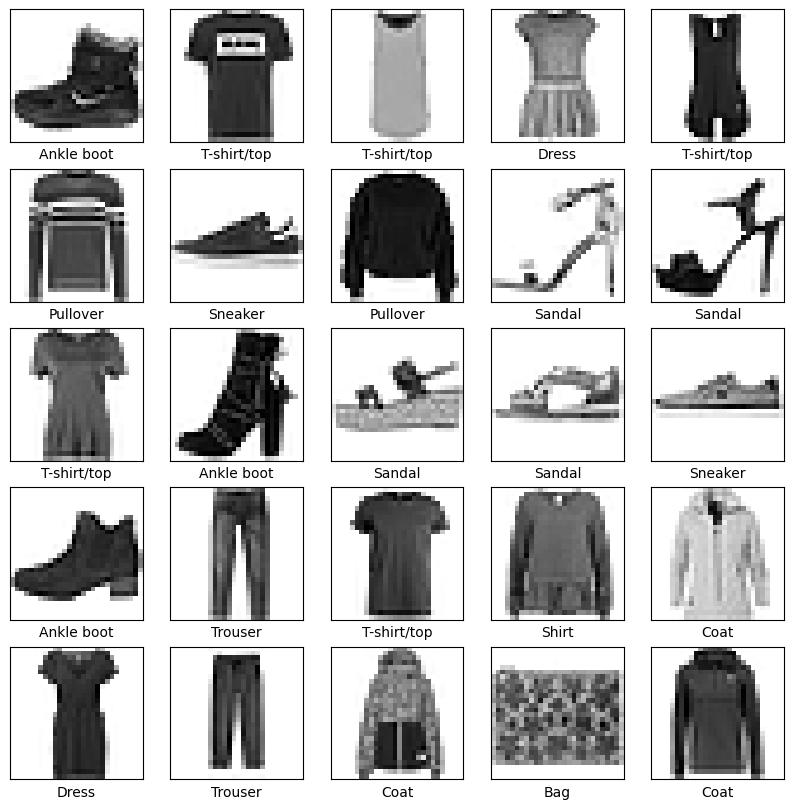

In [2]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Statistics


T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


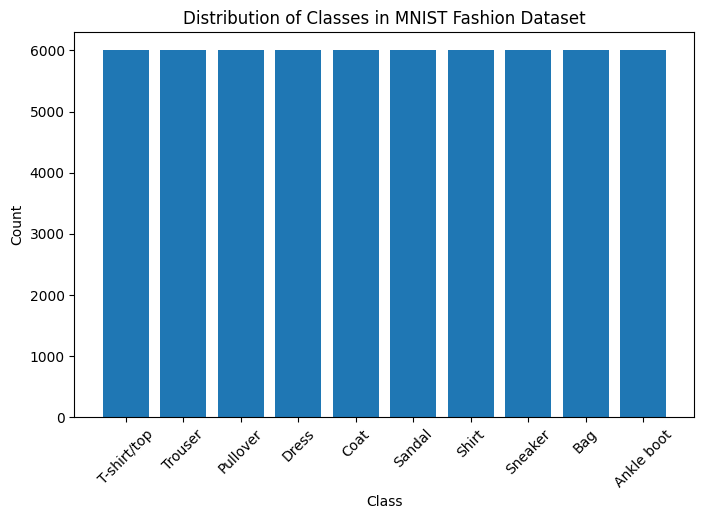

In [3]:
# Calculate the number of each group
unique, counts = np.unique(train_labels, return_counts=True)
class_count = dict(zip(class_names, counts))

# Display the count of each group
for name, count in class_count.items():
    print(f'{name}: {count}')

# Plotting the distribution
plt.figure(figsize=(8, 5))
plt.bar(class_names, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in MNIST Fashion Dataset')
plt.xticks(rotation=45)
plt.show()



Thank you, now please build a model that receives an image. For each image- Flatten the input image from matrix to vector by tf.keras.layers.Flatten. And also normalize the images by dividing the each of the pixels by 255.
Output is classification of a num (0-9) as in the MNIST dataset with the corresponding label. The num will be calculated as the highest probability calculated by the model, for this- use argmax. Add the activation function nn.softmax().
 Work with crossentropy as the loss function.


In [4]:
import numpy as np
from tensorflow import keras

# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input image
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Using crossentropy as the loss function
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display some predictions
for i in range(10):
    print(f"Predicted: {predicted_labels[i]}, Actual: {test_labels[i]}")


Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4965 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3741 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3358 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3130 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8706
Test accuracy: 0.8705999851226807
313/313 [==============================] - 1s 2ms/step
Predicted: 9, Actual: 9
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 6, Actual: 6
Predicted: 1, Actual: 1
Predicted: 4, Actual: 4
Predicted: 6, Actual: 6
Predicted: 5, Actual: 5
Predicted: 7, Actual: 7



write me a code and provide me with a random grayscale photo of a clothing item to be classified in order to test this model.

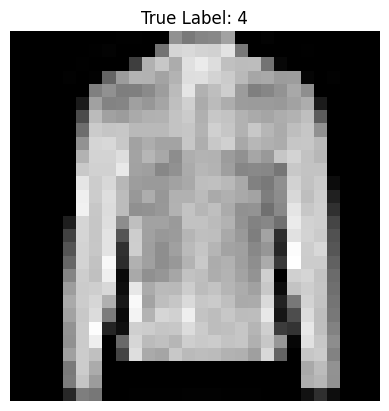

1/1 [==============================] - 0s 29ms/step
Predicted Label: Coat
Predicted Label: 4


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(_, _), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
test_images = test_images / 255.0

# Load the trained model
model = model  # Replace 'path_to_your_model.h5' with the actual path to your trained model file

# Select a random image from the test set
random_index = np.random.randint(0, len(test_images))
image = test_images[random_index]
label = test_labels[random_index]

# Display the random image
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {label}")
plt.axis('off')
plt.show()

# Reshape the image to match the model's input shape
image = np.expand_dims(image, axis=0)

# Make a prediction using the model
predictions = model.predict(image)
predicted_label = np.argmax(predictions)

# Map the predicted label to the corresponding label name
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predicted_label_name = class_names[predicted_label]

# Display the prediction
print(f"Predicted Label: {predicted_label_name}")

# Display the prediction
print(f"Predicted Label: {predicted_label}")
